## Spatial equity

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
import geopandas as gpd
import cartopy.crs as ccrs
import cartogram
import netCDF4

from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.animation import FuncAnimation


An issue in modelling is the number of regions that exist in the model, and the way difference in living conditions are being taken into account. 

In [37]:
variables = ['define_tot_eq_define_total_impact',
       'dice_tot_eq_dice_total_impact',   
       'witness_tot_eq_witness_total_impact']

other_variables = ['extra_extra_exponent',
       'extra_extra_normalisation_constant', 'extra_extra_gdp_modifyer']

In [38]:
ds_path = r'..\..\..\results\final_test.nc'
ds = xr.open_dataset(ds_path)

data = ds[variables+other_variables].to_dataframe().reset_index()
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()
data = data.rename(columns={'define_tot_eq_define_total_impact': 'Define',
                            'dice_tot_eq_dice_total_impact': 'DICE',
                            'witness_tot_eq_witness_total_impact': 'Witness',
                            'extra_extra_exponent': 'exponent',
                            'extra_extra_normalisation_constant': 'constant',
                            'extra_extra_gdp_modifyer': 'coef'})

ds.close()

In [39]:
data.head()

,Run,time,region,Define,DICE,Witness,exponent,constant,coef
0,0,2005.0,AUSTRIA,0.000000,0.000000,0.000000,0.582127,47277.739995,0.000000
1,0,2005.0,BELGIUM,644.310354,778.328031,1315.126518,0.582127,47277.739995,0.686361
2,0,2005.0,BULGARIA,25.010835,30.213133,51.050573,0.582127,47277.739995,0.247350
3,0,2005.0,CROATIA,34.824074,42.067542,71.080749,0.582127,47277.739995,0.344144
4,0,2005.0,CYPRUS,21.452018,25.914075,43.786535,0.582127,47277.739995,0.516904


In [5]:
decades = np.arange(2010, 2051, 10)


map = gpd.read_file(r'../3_modelling\geography\output_countries\countries.shp')

vmin = 0 #data[variables].values.min()
vmax = 1000000 #data[variables].values.max()

column_titles = ['DEFINE', 'DICE', 'WITNESS']

In [19]:
map

,pop_est,continent,name,iso_a3,gdp_md_est,WILIAM reg,WILIAM cod,region,FUND code,FUND regio,Country,ISO,geometry
0,889953.0,Oceania,Fiji,FJI,5496,Rest of the world,LROW,LROW,SIS,Small Island States,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,Rest of the world,LROW,LROW,SSA,Sub-Saharan Africa,Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,Rest of the world,LROW,LROW,NAF,North Africa,Western Sahara,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"United States, Mexico and Canada",USMCA,USMCA,CAN,Canada,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"United States, Mexico and Canada",USMCA,USMCA,USA,USA,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,6944975.0,Europe,Serbia,SRB,51475,Rest of the world,LROW,None,None,None,None,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
180,622137.0,Europe,Montenegro,MNE,5542,Rest of the world,LROW,None,None,None,None,None,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
181,1794248.0,Europe,Kosovo,-99,7926,Rest of the world,LROW,None,None,None,None,None,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
182,1394973.0,North America,Trinidad and Tobago,TTO,24269,Rest of the world,LROW,LROW,SIS,Small Island States,Trinidad and Tobago,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


<Axes: >

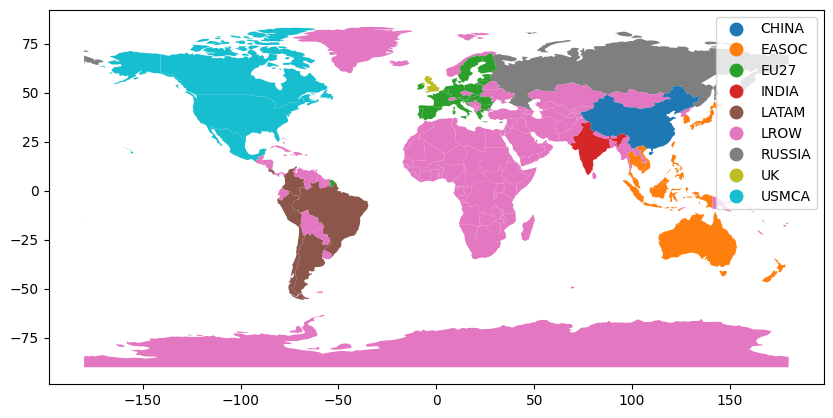

In [24]:
map['WILIAM cod'] = map['WILIAM cod'].str.upper()
map.plot(column='WILIAM cod', legend=True, figsize=(10, 10))

Merging data for 2010 and Define
Merging data for 2020 and Define
Merging data for 2030 and Define
Merging data for 2040 and Define
Merging data for 2050 and Define
Merging data for 2010 and DICE
Merging data for 2020 and DICE
Merging data for 2030 and DICE
Merging data for 2040 and DICE
Merging data for 2050 and DICE
Merging data for 2010 and Witness
Merging data for 2020 and Witness
Merging data for 2030 and Witness
Merging data for 2040 and Witness
Merging data for 2050 and Witness


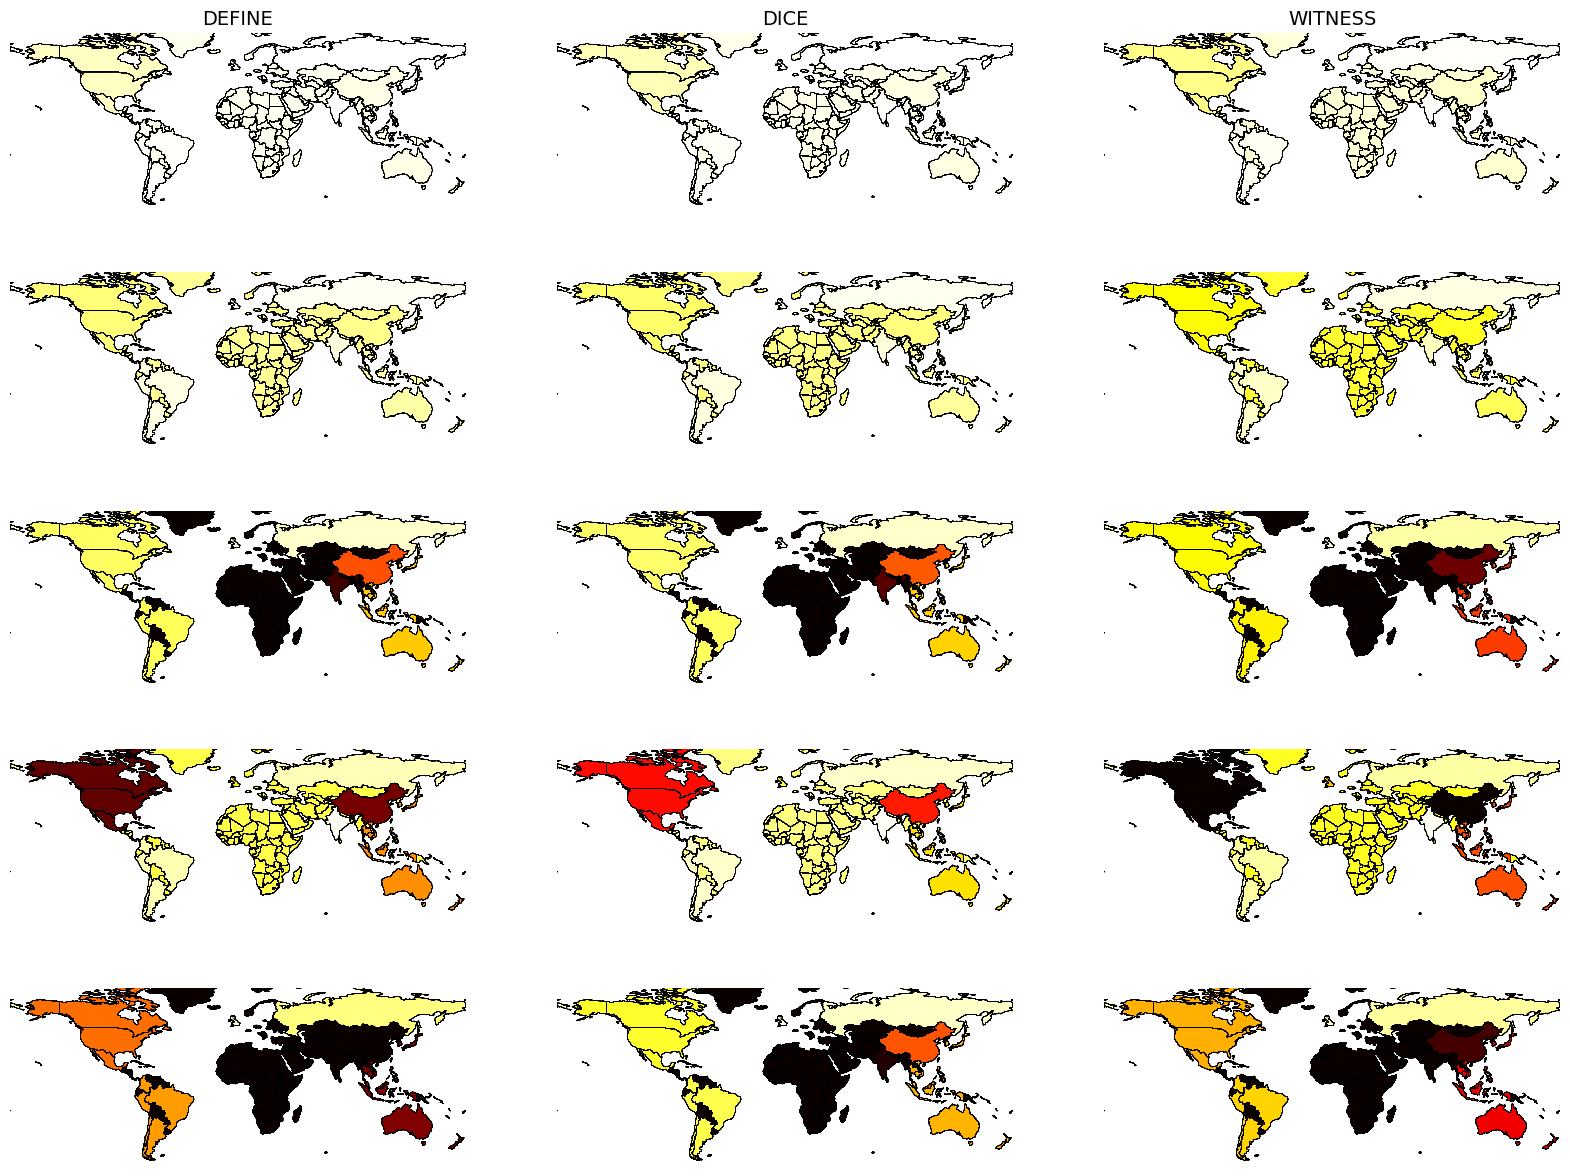

In [183]:

fig, ax = plt.subplots(len(decades), len(variables), figsize=(20, 15))

variables = ['Define', 'DICE', 'Witness']

for j, r in enumerate(variables):
    for i, d in enumerate(decades):
        map_variable = map.merge(data[data['time'] == d], left_on='WILIAM cod', right_on='region')
        print(f'Merging data for {d} and {r}')

        ax[i, j].set_axis_off()
        ax[i, j].set_xlim(-180, 180)
        ax[i, j].set_ylim(-60, 80)

        map_variable.boundary.plot(ax=ax[i, j], linewidth=0.2, color='black', alpha=0.5)
        map_variable.plot(column=r, ax= ax[i,j], cmap='hot_r', vmin=vmin, vmax=vmax)

        if i == 0:  # Ajouter un titre à la première ligne de chaque colonne
            ax[i, j].set_title(column_titles[j], fontsize=14)

        if j == 0:
            ax[i, j].set_ylabel(f'{d}', fontsize=18, rotation=90)
        
# Créer un objet Normalize pour normaliser les valeurs dans [vmin, vmax] à [0, 1]
norm = Normalize(vmin=vmin, vmax=vmax)

# Créer une ScalarMappable pour mapper les valeurs normalisées à une colormap
sm = ScalarMappable(cmap='hot_r', norm=norm)
sm.set_array([])  # Mettre un tableau vide, les données ne sont pas encore nécessaires

# Ajout d'une colorbar commune pour toutes les sous-graphiques
#cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', shrink=0.6)
#cbar.set_label('Damage level')  # Définir le label de la colorbar

#plt.tight_layout()

#plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.1, hspace=0.1)


plt.savefig('../../../../Memoire/results/carte_progressive.png', dpi=300)


### Cartogram

In [110]:

map_variable_dissolved = map.merge(data[(data['time'] == 2040) & (data['Run'] == 1)], left_on='WILIAM cod', right_on='region').dissolve(by='WILIAM cod', aggfunc={'Define': 'sum'}).reset_index()
c = cartogram.Cartogram(map_variable_dissolved, 'Define')

c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\cartogram\cartogram.py:268: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return self.geometry.area.sum()
c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\cartogram\cartogram.py:268: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return self.geometry.area.sum()
c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\cartogram\cartogram.py:268: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return self.geometry.area.sum()
c:\Users\gabriel.genel

In [111]:
c.explore()

<Axes: >

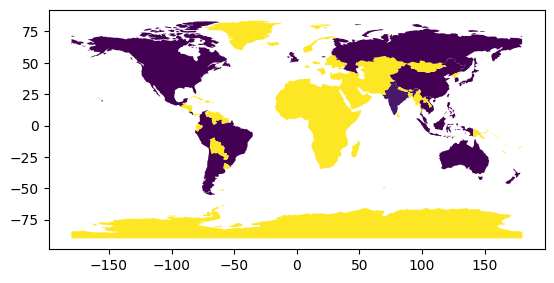

In [113]:
c.plot(column='Define')

<Axes: >

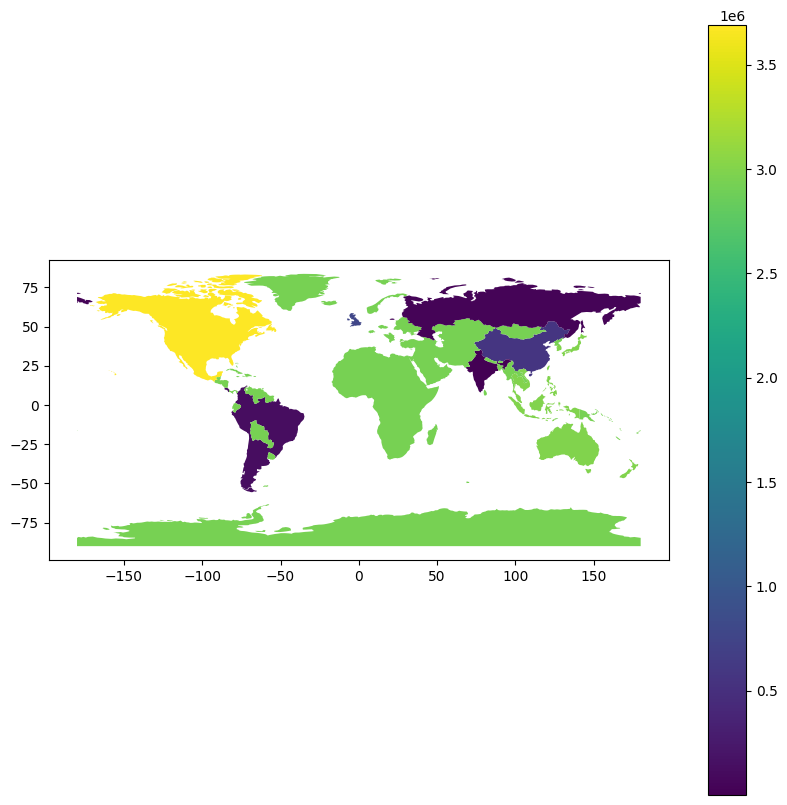

In [80]:
#fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})

#high_ponderation = data[(data['exponent'] > 1) & (data['constant'] < 20000)]
subset = data[(data['exponent'] > 1) & (data['constant'] > 25000)]


high_ponderation_mean = high_ponderation.groupby(['time', 'region']).agg({'Define': 'sum', 
                                                                         'DICE': 'sum',
                                                                         'Witness': 'sum'}).reset_index()

year=2040
high_ponderation_mean_year = high_ponderation_mean[high_ponderation_mean['time'] == year]
map_high_ponderation_mean_year = map.merge(high_ponderation_mean_year, left_on='WILIAM cod', right_on='region').dissolve(by='WILIAM cod', aggfunc={'Define': 'sum'}).reset_index()

map_high_ponderation_mean_year.plot(column='Define', legend=True, figsize=(10, 10)) 
#map.plot(column='WILIAM cod', legend=True, figsize=(10, 10))


In [208]:
#fig, axs = plt.subplots(1, 3, figsize=(20, 10))

def map_cartogram_from_subset(subset, year=2070, ax=None, model = 'DICE', target_crs="EPSG:4326"):

    

    subset_mean = subset.groupby(['time', 'region']).agg({'Define': 'sum', 
                                                                            'DICE': 'sum',
                                                                            'Witness': 'sum'}).reset_index()

    subset_mean_year = subset_mean[subset_mean['time'] == year]
    map_subset_mean_year = map.merge(subset_mean_year, left_on='WILIAM cod', right_on='region').dissolve(by='WILIAM cod', aggfunc={model: 'sum'}).reset_index()

    # Changer le CRS de map_subset_mean_year
    map_subset_mean_year = map_subset_mean_year.to_crs(target_crs)

    ax.set_aspect('equal')


    c = cartogram.Cartogram(map_subset_mean_year, model)
    c.plot(column='WILIAM cod', ax=ax, alpha=0.5)


    map_subset_mean_year.boundary.plot(ax=ax, linewidth=0.2, color='black', alpha=0.5)

    ax.set_axis_off()
    ax.set_xlim(-180, 180)
    ax.set_ylim(-60, 80)




def subset_from_data(data, exponent, const):

    coef_expo = 0.1
    coef_const = 0.3

    subset = data[(data['exponent'] < exponent * (1+coef_expo)) & (data['exponent'] > exponent * (1-coef_expo))    & (data['constant'] < const * (1+coef_const)) & (data['constant'] > const * (1-coef_const))]
    return subset

In [95]:
subset_test = subset_from_data(data, 1.5, 30000)
subset_test

,Run,time,region,Define,DICE,Witness,exponent,constant,coef
26460,11,2035.0,AUSTRIA,0.000000e+00,0.000000e+00,0.000000e+00,1.544151,29837.207403,0.000000
26461,11,2035.0,BELGIUM,2.451841e+04,2.419884e+04,4.118381e+04,1.544151,29837.207403,2.572642
26462,11,2035.0,BULGARIA,8.091742e+01,7.986276e+01,1.359178e+02,1.544151,29837.207403,0.116382
26463,11,2035.0,CROATIA,1.769210e+02,1.746150e+02,2.971759e+02,1.544151,29837.207403,0.252698
26464,11,2035.0,CYPRUS,5.392932e+01,5.322642e+01,9.058560e+01,1.544151,29837.207403,0.281600
...,...,...,...,...,...,...,...,...,...
107690,46,2045.0,INDIA,1.444289e+02,1.232935e+02,2.111192e+02,1.462864,27350.802423,0.004786
107691,46,2045.0,LATAM,1.861646e+04,1.589217e+04,2.721265e+04,1.462864,27350.802423,0.223528
107692,46,2045.0,RUSSIA,7.193113e+04,6.140489e+04,1.051455e+05,1.462864,27350.802423,0.977683
107693,46,2045.0,USMCA,1.706318e+06,1.456619e+06,2.494213e+06,1.462864,27350.802423,2.955770


(14420, 9)
(105846, 9)
(10851, 9)


c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\cartogram\cartogram.py:268: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return self.geometry.area.sum()
c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\cartogram\cartogram.py:268: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return self.geometry.area.sum()
c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\cartogram\cartogram.py:268: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return self.geometry.area.sum()
c:\Users\gabriel.genel

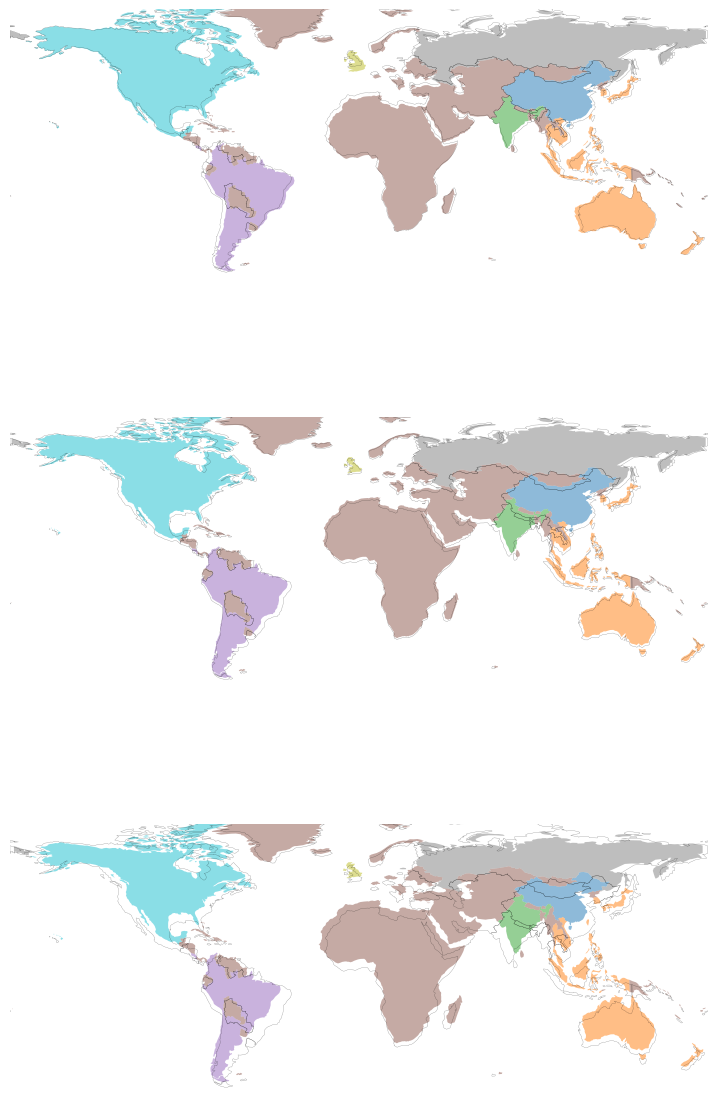

In [213]:
#subset_1 = data[(data['exponent'] > 1) & (data['constant'] > 30000)]
subset_1 = data[(data['exponent'] > 1) & (data['constant'] > 20000) ]
#subset_2 = data[(data['exponent'] < -1) & (data['constant'] > 20000) & (data['constant'] < 30000)]
subset_2 = data
subset_3 = data[(data['exponent'] < 1) & (data['constant'] < 15000)]

fig, axs = plt.subplots(3, 1, figsize=(9, 15))

year = 2040

print(subset_1.shape)
print(subset_2.shape)
print(subset_3.shape)
map_cartogram_from_subset(subset_1, year=year, ax=axs[0])
map_cartogram_from_subset(subset_2, year=year, ax=axs[1])
map_cartogram_from_subset(subset_3, year=year, ax=axs[2])

# Create a ScalarMappable for the colorbar
norm = Normalize(vmin=vmin, vmax=vmax)
sm = ScalarMappable(cmap='hot_r', norm=norm)
sm.set_array([])

# Add a colorbar to the figure
#cbar = fig.colorbar(sm, ax=axs, orientation='vertical', shrink=0.6)
#cbar.set_label('Damage level')


plt.savefig('../../../../Memoire/results/cartogramme_4.png', dpi=300)

#plt.tight_layout()
plt.show()

       Run    time    region        Define          DICE       Witness  \
6195     2  2050.0   AUSTRIA  0.000000e+00  0.000000e+00  0.000000e+00   
6196     2  2050.0   BELGIUM  6.129773e+05  4.206191e+05  7.282752e+05   
6197     2  2050.0  BULGARIA  3.630643e+03  2.491312e+03  4.313548e+03   
6198     2  2050.0   CROATIA  7.225544e+03  4.958098e+03  8.584631e+03   
6199     2  2050.0    CYPRUS  3.894360e+03  2.672272e+03  4.626869e+03   
...    ...     ...       ...           ...           ...           ...   
96945   41  2068.0     INDIA  2.669729e+04  1.259650e+04  2.238662e+04   
96946   41  2068.0     LATAM  2.935092e+05  1.384855e+05  2.461178e+05   
96947   41  2068.0    RUSSIA  2.054409e+07  9.693252e+06  1.722694e+07   
96948   41  2068.0     USMCA  5.294305e+07  2.497996e+07  4.439462e+07   
96949   41  2068.0      LROW  7.388084e+05  3.485897e+05  6.195169e+05   

       exponent      constant       coef  
6195   1.036286  10175.654278   0.000000  
6196   1.036286  10175.65

ValueError: aspect must be finite and positive 

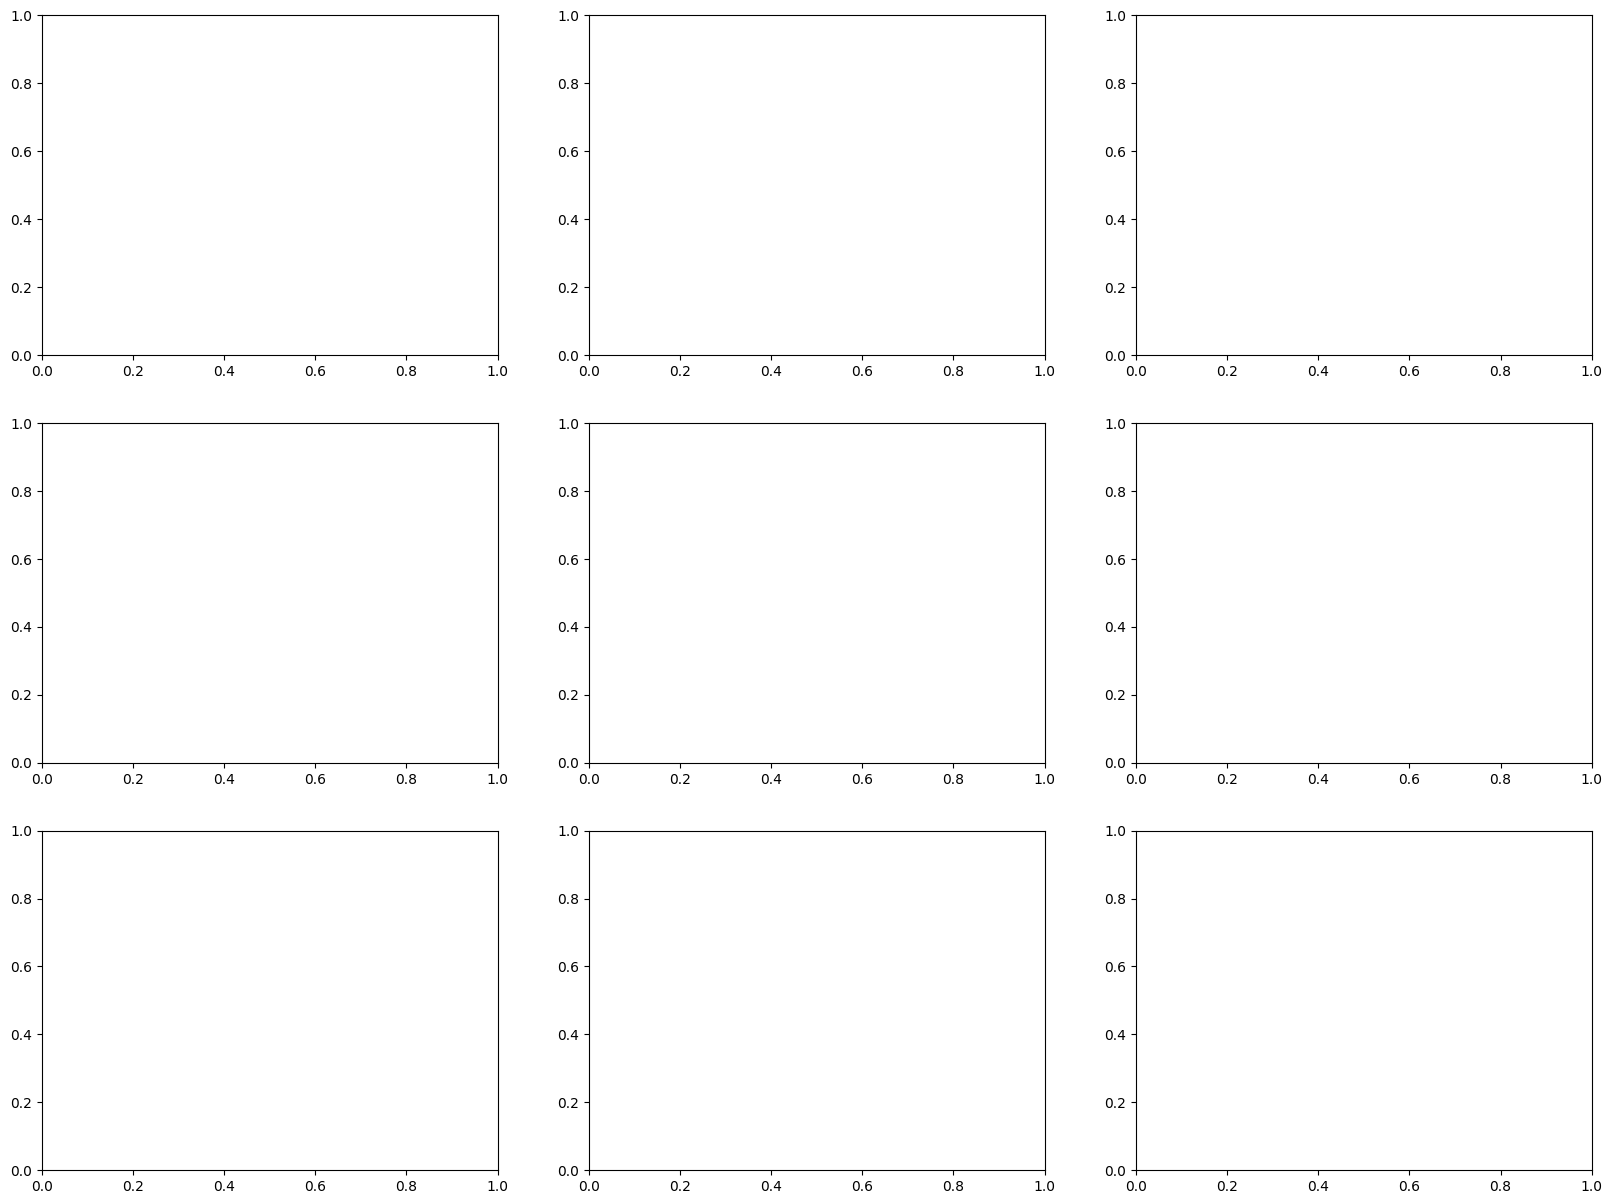

In [105]:
fig, axs = plt.subplots(3, 3, figsize=(20, 15))

year=2040

exponents = [1, 1, 1]
constants = [10000, 15000, 25000]

for i, e in enumerate(exponents):
    for j, c in enumerate(constants):
        subset = subset_from_data(data, e, c)
        print(subset)
        map_cartogram_from_subset(subset, year=year, ax=axs[i, j]) 

AttributeError: 'numpy.ndarray' object has no attribute 'set_aspect'

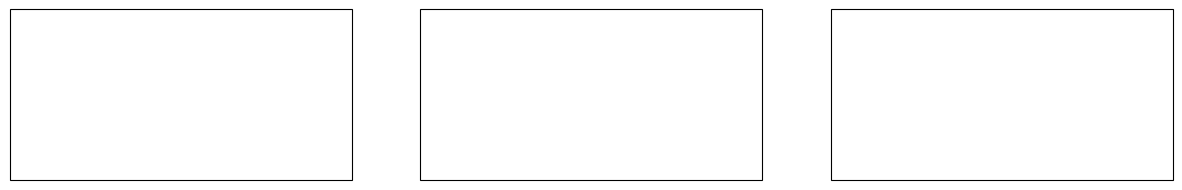

In [40]:
fig, ax = plt.subplots(1, 3, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})

map_variable.boundary.plot(ax=ax, linewidth=0.2, color='black', alpha=0.5)

c.plot('WILIAM cod',  ax=ax, alpha=0.5)

plt.savefig('../../../../Memoire/results/cartogramme.png')
plt.show()

### Maps showing the effects of the coefficients

In [10]:
data['actualised_damage_'] = data['define_tot_eq_define_total_impact'] / (1 + 0.01)**(data['time'] - 2020)

In [11]:
map_full = map.merge(data, left_on='region', right_on='region')
map_full_dissolved = map_full.dissolve(by='WILIAM cod', aggfunc={'define_tot_eq_define_total_impact': 'sum', 'dice_tot_eq_dice_total_impact': 'sum', 'witness_tot_eq_witness_total_impact':'sum' }).reset_index()

In [12]:
damage_aggregated = map_variable

# Supposons que tes données soient dans un DataFrame appelé damage_aggregated
# avec des colonnes 'impact', 'coefficient' et 'exponent'

# Discrétiser les valeurs du coefficient en 3 catégories : faible, moyen, élevé
damage_aggregated['coefficient_category'] = pd.qcut(damage_aggregated['coefficient'], q=3, labels=["Faible", "Moyen", "Élevé"])

# Discrétiser les valeurs de l'exposant en 3 catégories : faible, moyen, élevé
damage_aggregated['exponent_category'] = pd.qcut(damage_aggregated['exponent'], q=3, labels=["Faible", "Moyen", "Élevé"])

# Préparer la figure pour la grille 3x3
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Boucle pour parcourir chaque combinaison des catégories de coefficient et d'exposant
for i, coef_cat in enumerate(["Faible", "Moyen", "Élevé"]):
    for j, exp_cat in enumerate(["Faible", "Moyen", "Élevé"]):
        # Filtrer les données correspondant à la combinaison actuelle
        subset = damage_aggregated[(damage_aggregated['coefficient_category'] == coef_cat) & 
                                   (damage_aggregated['exponent_category'] == exp_cat)]
        
        # Tracer une carte des impacts pour ce sous-ensemble de données
        sns.scatterplot(x=subset['coefficient'], y=subset['impact'], ax=axes[i, j])
        
        # Ajouter un titre spécifique à chaque sous-graphe
        axes[i, j].set_title(f"Coef: {coef_cat}, Exp: {exp_cat}")
        axes[i, j].set_xlabel("Coefficient")
        axes[i, j].set_ylabel("Impact")

# Ajuster l'espacement entre les sous-graphes
plt.tight_layout()

# Afficher la figure
plt.show()


KeyError: 'coefficient'